In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df=pd.read_csv('/content/SMSSpamCollection',sep='\t',names=['label','message'])

In [171]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [173]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [174]:
spam=df[df['label']=='spam']
df=pd.concat([df,spam,spam])

In [175]:
df['length']=df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


(0.0, 700.0)

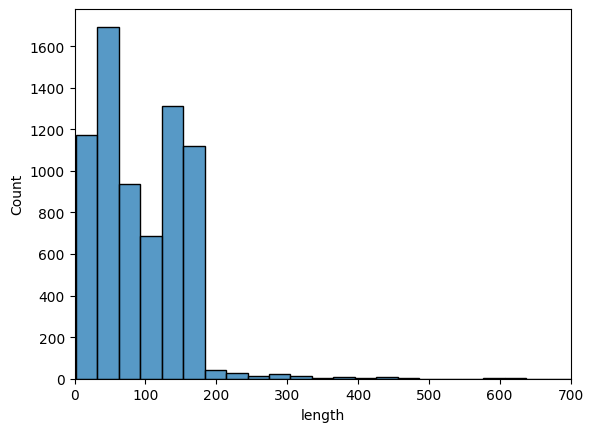

In [176]:
sns.histplot(df,x='length',bins=30)
plt.xlim(0,700)

(0.0, 700.0)

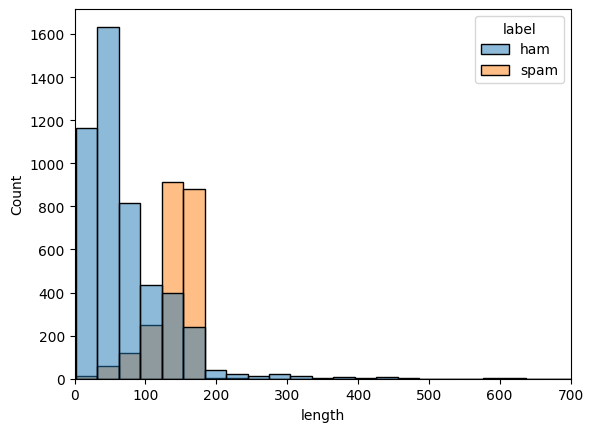

In [177]:
sns.histplot(df,x='length',hue='label',bins=30)
plt.xlim(0,700)

In [178]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Tokenization

In [179]:
import string
from nltk.corpus import stopwords

In [180]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [181]:
def txt_process(str):
  nopstr=[word for word in str if word not in string.punctuation]
  nopstr=''.join(nopstr)
  clean=[char for char in nopstr.split() if char.lower() not in stopwords.words('english')]
  return clean

In [182]:
df['message']=df['message'].apply(txt_process)

In [183]:
df

,label,message,length
0,ham,"[Go, jurong, point, crazy, Available, bugis, n...",111
1,ham,"[Ok, lar, Joking, wif, u, oni]",29
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",155
3,ham,"[U, dun, say, early, hor, U, c, already, say]",49
4,ham,"[Nah, dont, think, goes, usf, lives, around, t...",61
...,...,...,...
5537,spam,"[Want, explicit, SEX, 30, secs, Ring, 02073162...",90
5540,spam,"[ASKED, 3MOBILE, 0870, CHATLINES, INCLU, FREE,...",158
5547,spam,"[contract, mobile, 11, Mnths, Latest, Motorola...",160
5566,spam,"[REMINDER, O2, get, 250, pounds, free, call, c...",147


Vectorization

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
from sklearn.feature_extraction.text import TfidfTransformer

In [186]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [187]:
from sklearn.metrics import classification_report,confusion_matrix

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [203]:
pipe=Pipeline([('bow',CountVectorizer(analyzer=txt_process)),
('tfidf',TfidfTransformer()),
('classifier',RandomForestClassifier())
])


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7066 entries, 0 to 5567
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    7066 non-null   object
 1   message  7066 non-null   object
 2   length   7066 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 220.8+ KB


In [205]:
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.3)

In [206]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function txt_process at 0x7ef77eea5e10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [207]:
pred_pipe=pipe.predict(X_test)

In [201]:
print(classification_report(y_test,pred_pipe))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1458
        spam       1.00      0.93      0.96       662

    accuracy                           0.98      2120
   macro avg       0.99      0.97      0.97      2120
weighted avg       0.98      0.98      0.98      2120



In [208]:
print(confusion_matrix(y_test,pred_pipe))

[[1442    0]
 [  30  648]]
